# The Machine Learning Group Challenge!

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using a preprocessed version of the Lending Club loan dataset.

- Class into divided into 4 groups.

- The training data is 13689 loans labeled either as 1 (successful) or 0 (default). Comes with 30 categorical and numerical features. The testing data is also 13689 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will evaluate your model on the testing dataset. You cannot used testing data to train a model.

- Your profit will be determined by the amount of money you make from correctly predicting good loans (loan amount * interest rate/100.) subtracted by the money you lose from incorrectly predicting bad loans as good (-loan amount). I have given a function to calculate that.

- Finding the correct probability threshold will be super key in determing how much money you make.

- **VERY IMPORTANT:** You must transform your testing the data the same way you did your training data. So make sure you have the same columns in the same order.
        
- Stewart and I will be on be hand for guidance. However I want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/



### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:00
    - Feature engineering/selection: make dummy variables, dropping features, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:00 - 8:45
    - Modeling time!!
    
    
- 8:45 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Winner decision. Exit tickets.

In [37]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)
from sklearn.preprocessing import StandardScaler, LabelEncoder # add this for sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split #import for KNN
from sklearn.neighbors import KNeighborsClassifier #import for KNN

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [13]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
train = pd.read_csv("../../data/lending_club/challenge_training_data.csv")
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


In [4]:
#Load in data dictionary
data_dict = pd.read_csv("../../data/lending_club/the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,object,id,A unique LC assigned ID for the loan listing.
1,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
2,float64,funded_amnt,The total amount committed to that loan at that point in time.
3,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,object,int_rate,Interest Rate on the loan
5,float64,installment,The monthly payment owed by the borrower if the loan originates.
6,object,grade,LC assigned loan grade
7,object,emp_title,The job title supplied by the Borrower when applying for the loan.*
8,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
9,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...


In [14]:
train.drop(['id', 'emp_title','desc', 'title', 'last_credit_pull_d'], axis = 1, inplace = True)

In [15]:
train.columns

Index([u'loan_amnt', u'funded_amnt', u'term', u'int_rate', u'installment',
       u'grade', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'loan_status', u'purpose', u'dti',
       u'delinq_2yrs', u'fico_range_low', u'fico_range_high',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'total_acc', u'acc_now_delinq', u'delinq_amnt', u'tax_liens'],
      dtype='object')

In [ ]:
#Load in test data when you're ready 
# test = pd.read_csv("../../data/lending_club/challenge_testing_data.csv")

# to read nulls use info()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13689 entries, 0 to 13688
Data columns (total 25 columns):
loan_amnt              13689 non-null float64
funded_amnt            13689 non-null float64
term                   13689 non-null object
int_rate               13689 non-null object
installment            13689 non-null float64
grade                  13689 non-null object
emp_length             13689 non-null object
home_ownership         13689 non-null object
annual_inc             13689 non-null float64
verification_status    13689 non-null object
loan_status            13689 non-null int64
purpose                13689 non-null object
dti                    13689 non-null float64
delinq_2yrs            13689 non-null float64
fico_range_low         13689 non-null float64
fico_range_high        13689 non-null float64
inq_last_6mths         13689 non-null float64
open_acc               13689 non-null float64
pub_rec                13689 non-null float64
revol_bal              136

Here is the threshold function. Input your probabilities for class 1 and set a probability threshold of your choice. The default threshold is 0.5. The output will be 1's and 0s, 1 values for all the values that are greater or equal to your predetermined threshold value.

In [19]:
def convert_to_num(string_num):
    if string_num == "10+ years":
        return 10
    elif string_num == '9 years':
        return 9
    elif string_num == '8 years':
        return 8
    elif string_num == '7 years':
        return 7
    elif string_num == '6 years':
        return 6
    elif string_num == '5 years':
        return 5
    elif string_num == '4 years':
        return 4
    elif string_num == '3 years':
        return 3
    elif string_num == '2 years':
        return 2
    else:
        return 1

train['emp_length'] = train['emp_length'].map(convert_to_num)

In [21]:
train.head(3)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
0,3150.0,3150.0,36 months,10.99%,103.12,B,1,RENT,15300.0,Verified,1,debt_consolidation,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,0.0,0.0,0.0
1,10000.0,10000.0,36 months,7.51%,311.11,A,1,OWN,125000.0,Not Verified,1,debt_consolidation,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,0.0,0.0,0.0
2,11000.0,11000.0,36 months,12.53%,368.13,B,1,RENT,81600.0,Not Verified,1,other,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,0.0,0.0,0.0


In [22]:
train.shape

(13689, 25)

# replace % object to float

In [31]:
train['int_rate'] = train['int_rate'].str.replace('%', '').astype(float)
train['revol_util'] = train['revol_util'].str.replace('%', '').astype(float)

In [32]:
train

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,tax_liens
0,3150.0,3150.0,36 months,10.99,103.12,B,1,RENT,15300.0,Verified,1,debt_consolidation,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4,9.0,0.0,0.0,0.0
1,10000.0,10000.0,36 months,7.51,311.11,A,1,OWN,125000.0,Not Verified,1,debt_consolidation,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9,40.0,0.0,0.0,0.0
2,11000.0,11000.0,36 months,12.53,368.13,B,1,RENT,81600.0,Not Verified,1,other,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5,10.0,0.0,0.0,0.0
3,2200.0,2200.0,36 months,13.49,74.65,C,1,OWN,80000.0,Verified,1,debt_consolidation,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7,6.0,0.0,0.0,0.0
4,4500.0,4500.0,36 months,13.22,152.11,C,1,RENT,30555.0,Not Verified,1,debt_consolidation,4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7,14.0,0.0,0.0,0.0
5,15500.0,15500.0,36 months,11.99,514.75,B,1,OWN,38400.0,Source Verified,1,debt_consolidation,19.63,0.0,700.0,704.0,0.0,11.0,0.0,19033.0,92.5,23.0,0.0,0.0,0.0
6,6000.0,6000.0,36 months,11.34,197.40,C,1,RENT,32000.0,Not Verified,0,debt_consolidation,21.90,0.0,700.0,704.0,0.0,5.0,0.0,7152.0,100.7,12.0,0.0,0.0,0.0
7,13500.0,13500.0,36 months,13.99,461.34,C,1,RENT,57772.0,Not Verified,1,debt_consolidation,11.99,0.0,705.0,709.0,1.0,5.0,0.0,5896.0,90.7,16.0,0.0,0.0,0.0
8,4800.0,4800.0,36 months,12.12,159.71,B,1,RENT,60000.0,Not Verified,1,credit_card,22.08,0.0,695.0,699.0,2.0,17.0,0.0,7704.0,67.0,27.0,0.0,0.0,0.0
9,12000.0,12000.0,60 months,16.32,293.87,D,1,RENT,60000.0,Not Verified,0,major_purchase,9.74,0.0,680.0,684.0,1.0,9.0,0.0,6852.0,60.6,12.0,0.0,0.0,0.0


# set up x and y variables -  drop the output variable (loan yes or no)

In [34]:
X = train.drop(['loan_status'], axis = 1)
y = train.loan_status

In [35]:
le = LabelEncoder()
obj_col = X.dtypes.pipe(lambda Features: Features[Features=='object']).index
for c in obj_col:
    X[c] = le.fit_transform(X[c])

# KNN K Nearest Neighbors

In [38]:
#import

# instance
knn = KNeighborsClassifier(n_neighbors = 2)

#train
knn.fit(X, y)

# score
knn.score(X, y)


0.8465191029293594

In [41]:
# cross validation score:
from sklearn.model_selection import train_test_split

#test 25% of the the train data or you can do 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.7315220566754309

In [52]:
#import
from sklearn.cross_validation import cross_val_score, train_test_split

# cross validation 5 times on 80% of train data in different chunks
#assign a name for the predictions score of 5 ranges 

score_train = cross_val_score(KNeighborsClassifier(n_neighbors = 3), X, y, cv =5, scoring = "accuracy")

score_train


array([0.7257122 , 0.72826881, 0.7403214 , 0.73192111, 0.73182316])

In [59]:
#avg the score
score_train.mean()

0.7316093369732686

# Logistic Regression

In [60]:
#Logistic Regression
from sklearn import linear_model, cross_validation
from sklearn.cross_validation import cross_val_score

model = linear_model.LogisticRegression()
model.fit(X,y)
model.score(X,y)

cv = cross_val_score(model, X, y, cv = 5, scoring = "accuracy")
cv.mean()



0.8259190334119484

# Decision Tree

Text(0,0.5,u'Average Cross Validated Accuracy')

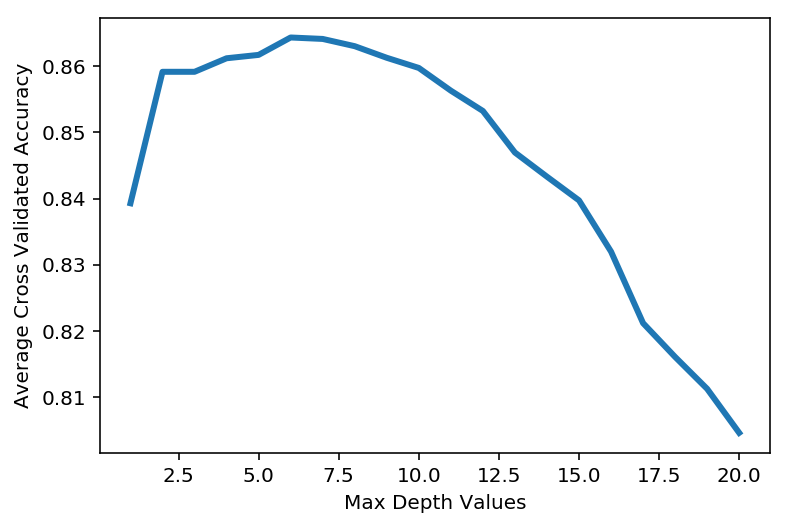

In [62]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

depths = range(1,21)
cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth = i), X, y, cv = 5, scoring = "accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy")



In [71]:
#Max Depth 7 is yields the best score. 86.43%

In [68]:
cv_scores

[0.8392873356030887,
 0.8591574807583655,
 0.8591574807583655,
 0.8612028760435478,
 0.8617141981764916,
 0.8643440416786653,
 0.8641247701799302,
 0.8630290798950506,
 0.861275548425614,
 0.8597414218966717,
 0.856307992120531,
 0.8532400059461647,
 0.8469577814293373,
 0.8433047065175356,
 0.8397249978849481,
 0.8319821465601516,
 0.8211697611365821,
 0.8160566198722001,
 0.8112355292420268,
 0.8045872472913326]

In [69]:
max(cv_scores)

0.8643440416786653

# Random Forest

In [72]:
#Random Forest
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier

rfreg = RandomForestClassifier(n_estimators=150, max_features=20, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=5, scoring='accuracy')

scores.mean()


0.8637593532665075

# AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada_data = X
ada_data['target'] = y
ada_data['predicted'] = threshold(ada_y_prob, thres = .51)

ada_data['profit'] = ada_data.apply(profit_function, axis=1)

ada_data.profit.sum()

15436925.452500043

# predict using Decision Tree

In [90]:
tree_model = DecisionTreeClassifier(max_depth = 7)

predictions = []


tree_model.fit(X,y)
y_pred = tree_model.predict(X)
y_prob = tree_model.predict_proba(X)

tree_y_prob = y_prob[:,1]

# predict using KNN

In [87]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

predictions = []


knn_model.fit(X,y)
y_pred = knn_model.predict(X)
y_prob = knn_model.predict_proba(X)

knn_y_prob = y_prob[:,1]

# predict using adaboost

In [88]:
ada_model = AdaBoostClassifier(n_estimators=45)

predictions = []


ada_model.fit(X,y)
y_pred = ada_model.predict(X)
y_prob = ada_model.predict_proba(X)

ada_y_prob = y_prob[:,1]

In [28]:
train.dtypes

loan_amnt              float64
funded_amnt            float64
term                    object
int_rate                object
installment            float64
grade                   object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status              int64
purpose                 object
dti                    float64
delinq_2yrs            float64
fico_range_low         float64
fico_range_high        float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
acc_now_delinq         float64
delinq_amnt            float64
tax_liens              float64
dtype: object

In [ ]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))
    return scores


In [92]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

In [91]:
tree_data = X
tree_data['target'] = y

profit_scores = []
thresh_scores = []

for i in range(50,95):
    tree_data['predicted'] = threshold(tree_y_prob, thres = i/100.0)
    tree_data['profit'] = tree_data.apply(profit_function, axis=1)
    profit_scores.append(tree_data.profit.sum())
    thresh_scores.append(i/100.0)


# output = zip(profit_scores,thresh_scores)
zip(thresh_scores,profit_scores)

[(0.5, 15436925.452500043),
 (0.51, 15436925.452500043),
 (0.52, 15436925.452500043),
 (0.53, 15436925.452500043),
 (0.54, 15436925.452500043),
 (0.55, 15436925.452500043),
 (0.56, 15436925.452500043),
 (0.57, 15436925.452500043),
 (0.58, 15436925.452500043),
 (0.59, 15436925.452500043),
 (0.6, 15436925.452500043),
 (0.61, 15436925.452500043),
 (0.62, 15436925.452500043),
 (0.63, 15436925.452500043),
 (0.64, 15436925.452500043),
 (0.65, 15436925.452500043),
 (0.66, 15436925.452500043),
 (0.67, 15436925.452500043),
 (0.68, 15436925.452500043),
 (0.69, 15436925.452500043),
 (0.7, 15436925.452500043),
 (0.71, 15436925.452500043),
 (0.72, 15436925.452500043),
 (0.73, 15436925.452500043),
 (0.74, 15436925.452500043),
 (0.75, 15436925.452500043),
 (0.76, 15436925.452500043),
 (0.77, 15436925.452500043),
 (0.78, 15436925.452500043),
 (0.79, 15436925.452500043),
 (0.8, 15436925.452500043),
 (0.81, 15436925.452500043),
 (0.82, 15436925.452500043),
 (0.83, 15436925.452500043),
 (0.84, 15436925.4

This is the profit function. It takes in a dataframe with the loan_amnt, int_rate, target variable, and class predictions values.

- It first checks to see if a row has 0 in the outcome column and 1 in the predicted (false positive) and returns the negative value of the loan_amnt. This is how much money you lost for loans that mean that condition.

- Then it checks for true positives, meaning conditions where both the target and predicted values equal 1, then return the loan_amnt times the int_rate divided by 100. This is how much money you made from loans that meet this condition.

- Everything else gets a zero.

In [3]:
def profit_function(data):
    if data.target == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.target == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

Here's an example of using the threshold and profit_functions

In [7]:
#List of probabilities
probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])

#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.7)
preds

array([0, 0, 1, 1, 0, 1])

In [8]:
sample_df = {"loan_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}

#Put dictionary in data frame

profit_df = pd.DataFrame(sample_df)

profit_df

,int_rate,loan_amnt,target
0,18,1000,0
1,20,500,1
2,4,200,0
3,5,5000,1
4,2,3000,0
5,10,6000,1


In [8]:
#Add in predictions

profit_df["predicted"] = preds
profit_df

,int_rate,loan_amnt,target,predicted
0,18,1000,0,0
1,20,500,1,0
2,4,200,0,1
3,5,5000,1,1
4,2,3000,0,0
5,10,6000,1,1


In [11]:
#Apply function onto data frame
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series

0      0.0
1      0.0
2   -200.0
3    250.0
4      0.0
5    600.0
dtype: float64

In [12]:
#Sum up profits and losses
profit_series.sum()

650.0

This model made $650

## Let the games begin!!